In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score

C:\Users\hp\.anaconda\py\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel('spamSMS.xlsx')

In [3]:
import sklearn

print(sklearn.__version__)

1.5.1


In [4]:
df.shape

(5571, 2)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website Apply
8. Deployment

# 1. Data Cleaning

In [5]:
df.sample(3)

,Result,Text
287,ham,hi baby im cruisin with my girl friend what r ...
4626,ham,Lol ... I knew that .... I saw him in the doll...
44,ham,No calls..messages..missed calls


In [6]:
le = LabelEncoder()
df['Result'] = le.fit_transform(df['Result'])

In [7]:
df = df.drop_duplicates(keep = 'first')

# 2. EDA

In [8]:
df["Result"].value_counts()

Result
0    4515
1     653
Name: count, dtype: int64

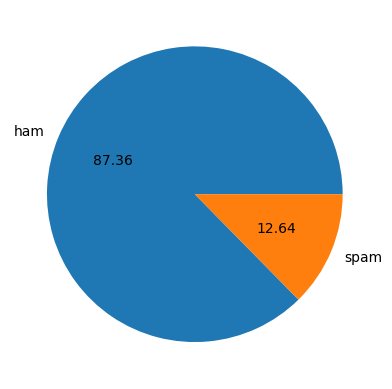

In [9]:
plt.pie(df['Result'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [10]:
df['Text'] = df['Text'].apply(lambda Text : str(Text))

In [11]:
df.sample(3)

,Result,Text
2638,0,Am in gobi arts college
1924,0,Ok
470,1,okmail: Dear Dave this is your final notice to...


In [12]:
import nltk

In [13]:
df['num_characters'] = df['Text'].apply(len)
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [14]:
df

,Result,Text,num_characters,num_words,num_sentences
0,0,Ok lar... Joking wif u oni...,29,8,2
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
2,0,U dun say so early hor... U c already then say...,49,13,1
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4
...,...,...,...,...,...
5566,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5567,0,Will ü b going to esplanade fr home?,36,9,1
5568,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5569,0,The guy did some bitching but I acted like i'd...,125,27,1


In [15]:
df[['Result', 'num_characters','num_words', 'num_sentences']].corr()

,Result,num_characters,num_words,num_sentences
Result,1.000000,0.379847,0.260205,0.263831
num_characters,0.379847,1.000000,0.966004,0.622596
num_words,0.260205,0.966004,1.000000,0.679152
num_sentences,0.263831,0.622596,0.679152,1.000000


# 3. TEXT PREPROCESSING

In [16]:
import string
string.punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [17]:
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [18]:
#1 and 2:
def transformation(texts):
    texts = texts.lower().split()  
    
    alpha_num = []
    
    for words in texts:
        if words.isalnum():
            alpha_num.append(words) 
    
    filtered = []
    
    
    for items in alpha_num:
        if items not in stopwords.words('english') and items not in string.punctuation:
            filtered.append(items)
    
    dancing_danc = []
    
    for items in filtered:
        dancing_danc.append(ps.stem(items))
    
    return " ".join(dancing_danc)

In [19]:
df['Transformed Text'] = df['Text'].apply(lambda x: transformation(x))

In [20]:
df.head()

,Result,Text,num_characters,num_words,num_sentences,Transformed Text
0,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
1,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
2,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli u c alreadi
3,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though
4,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 word like fun tb xxx std ch...


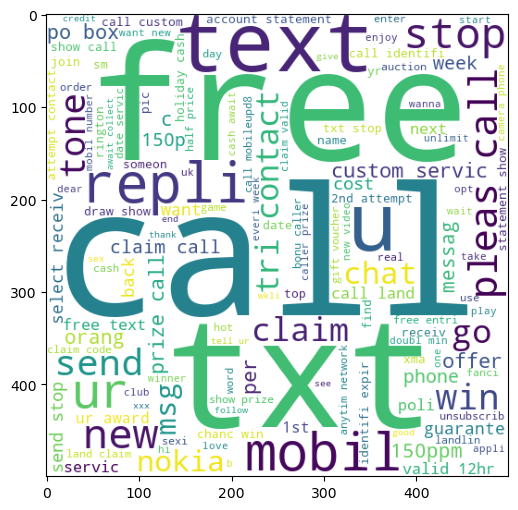

In [21]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Result'] == 1]['Transformed Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

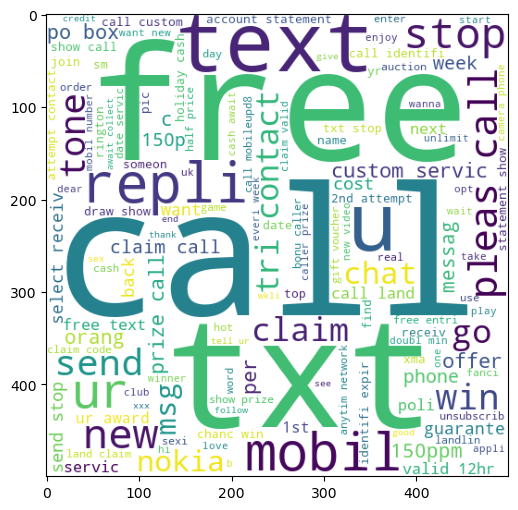

In [22]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['Result'] == 0]['Transformed Text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [23]:
lists1 = []
for msg in df[df['Result']==1]['Transformed Text'].tolist():
    for words in msg.split():
        lists1.append(words)

In [24]:
lists2 = []
for msg in df[df['Result']==0]['Transformed Text'].tolist():
    for words in msg.split():
        lists2.append(words)

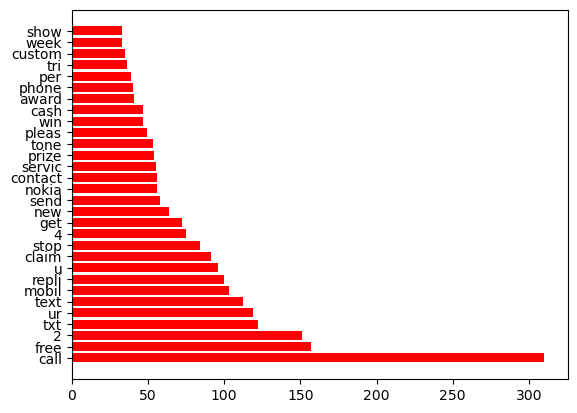

In [25]:
from collections import Counter
common_spam_words = Counter(lists1).most_common(30)

spam_words = pd.DataFrame(common_spam_words, columns = ['Words', "Number"])

plt.barh(spam_words['Words'], spam_words['Number'], color= 'red')
plt.show()

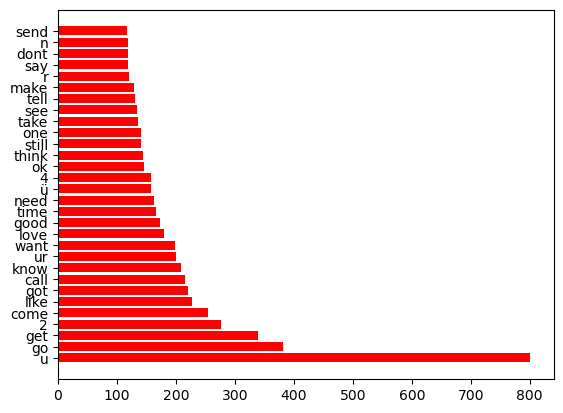

In [26]:
from collections import Counter
common_ham_words = Counter(lists2).most_common(30)

ham_words = pd.DataFrame(common_ham_words, columns = ['Words', "Number"])

plt.barh(ham_words['Words'], ham_words['Number'], color= 'red')
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [28]:
X = tfidf.fit_transform(df['Transformed Text']).toarray()
y = df['Result'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [30]:
# Applying stacking
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

estimators=[('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [31]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9700193423597679
Precision 0.8939393939393939


In [1]:
import pickle
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(clf,open('Finalmodel.pkl','wb'))

NameError: name 'tfidf' is not defined